In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["image.cmap"] = "gray"

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping, Callback

In [3]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

In [4]:
print(train_images.shape)
print(train_labels.shape)
print()
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)

(10000, 28, 28)
(10000,)


In [5]:
class_names = ["Top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankleboot"]

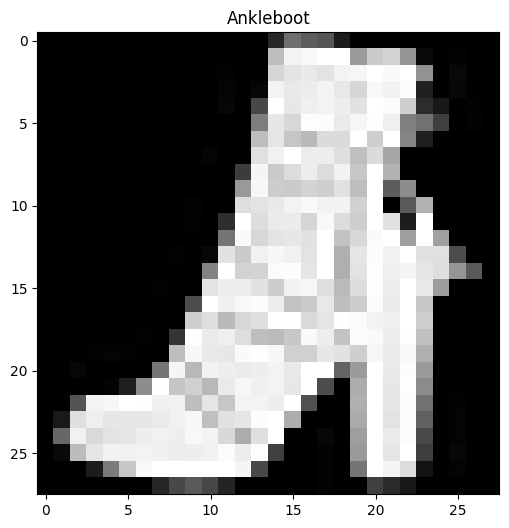

In [6]:
plt.figure(figsize=(8, 6))
plt.imshow(train_images[11])
plt.title(class_names[train_labels[11]]);

In [9]:
train_images = train_images / 255.0
test_images = test_images / 255.0

### Building the Model

In [10]:
# EarlyStopping
callbacks = EarlyStopping(monitor="val_loss", patience=5, verbose=1, restore_best_weights=True)

In [12]:
# Build, compile and fit
model = Sequential(
    [
        Flatten(input_shape=(28, 28)),
        Dense(100, activation="relu"),
        Dense(10, activation="softmax")
    ]
)

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

histoy = model.fit(
    train_images,
    train_labels,
    epochs=100,
    callbacks=[callbacks],
    validation_split=0.2
)

c:\Users\Usuario iTC\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7701 - loss: 0.6594 - val_accuracy: 0.8586 - val_loss: 0.4095
Epoch 2/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8548 - loss: 0.4062 - val_accuracy: 0.8609 - val_loss: 0.3809
Epoch 3/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8702 - loss: 0.3578 - val_accuracy: 0.8729 - val_loss: 0.3617
Epoch 4/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8834 - loss: 0.3210 - val_accuracy: 0.8733 - val_loss: 0.3560
Epoch 5/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8854 - loss: 0.3096 - val_accuracy: 0.8796 - val_loss: 0.3382
Epoch 6/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8931 - loss: 0.2909 - val_accuracy: 0.8664 - val_loss: 0.3736
Epoch 7/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9002 - loss: 0.2743 - val_accuracy: 0.8826 - val_loss: 0.3271
Epoch 8/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9008 - loss: 0

In [13]:
# Let's see what our test accuracy looks like
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8832 - loss: 0.3435
Test Accuracy: 0.8831999897956848


Text(0, 0.5, 'Epoch')

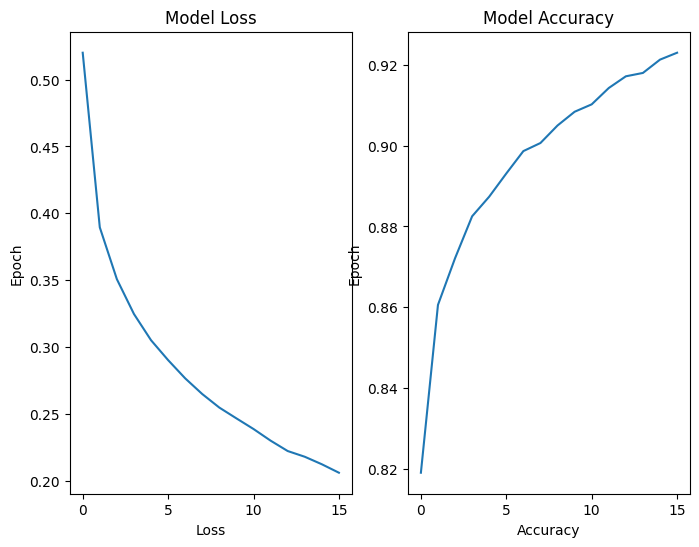

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(8, 6))
ax[0].plot(histoy.history["loss"])
ax[0].set_title("Model Loss")
ax[0].set_xlabel("Loss")
ax[0].set_ylabel("Epoch")

ax[1].plot(histoy.history["accuracy"])
ax[1].set_title("Model Accuracy")
ax[1].set_xlabel("Accuracy")
ax[1].set_ylabel("Epoch")

### Early Stopping with custom callbacks

We can extend the capabilities of callbacks by writing our own custom callbacks for early stopping.

This adds flexibility to callbacks so we can implement some desired logic during training. The TensorFlow documentation provides several ways to do this. Let's implement a simple callback to track our validation accuracy:

In [17]:
class EarlyStop(Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get("val_accuracy") > 0.85):
            print("Validation Accuracy has been reached.")
            self.model.stop_training = True
callback = EarlyStop()